## Problem Scenario:

In this project we have a dataset containing stock prices of Google from May-2009 to August-2018. We have both AMD and Google datasets. We are using only Google data as of now. 

Dataset Source: https://www.kaggle.com/gunhee/amdgoogle

We are using the stock prices data from 2009 to 2017 (9 years) for training the neural network and predict the stock prices for the year 2018. This is a Regression problem.

To achieve this goal, we will train a **Recurrent Neural Network (LSTM)**. We will use one of the deep learning libraries, **Keras**, to build the neural network.


## Importing the Libraries

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
!pip install keras
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/b2/86/095d2f7829badc207c893dd4ac767e871f6cd547145df797ea26baea4e2e/setuptools-41.2.0-py2.py3-none-any.whl
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


## Loading the dataset

In [14]:
totaldata = pd.read_csv("dataset/GOOGL.csv")

In [15]:
totaldata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [16]:
totaldata.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2330,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2331,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2332,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2333,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500
2334,2018-08-29,1255.000000,1267.170044,1252.800049,1264.650024,1264.650024,1846300


In [17]:
totaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
Date         2335 non-null object
Open         2335 non-null float64
High         2335 non-null float64
Low          2335 non-null float64
Close        2335 non-null float64
Adj Close    2335 non-null float64
Volume       2335 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 127.8+ KB


In [67]:
# dataframe.size 
print("Size = ", totaldata.size)

# dataframe.shape 
shape = totaldata.shape 
print("Shape = ", shape)
print("Shape[0] x Shape[1] = {}".format(shape[0]*shape[1])) 

Size =  16345
Shape =  (2335, 7)
Shape[0] x Shape[1] = 16345


## Exploratory Data Analysis

In [18]:
totaldata.dataframeName = 'GOOGL.csv'
nRow, nCol = totaldata.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2335 rows and 7 columns


Let's take a quick look at what the data looks like

In [19]:
totaldata.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [70]:
#statistical summary of the attributes

totaldata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


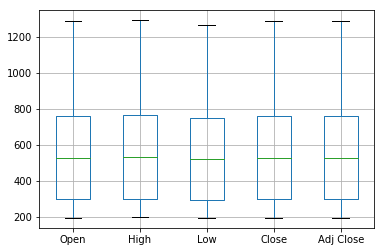

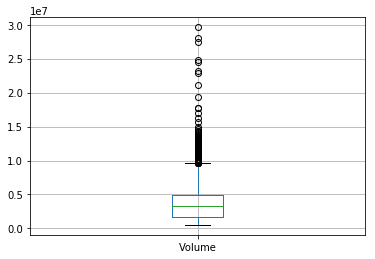

In [21]:
# boxplots

totaldata.iloc[:,0:6].boxplot()
plt.show()

totaldata.iloc[:,6:7].boxplot()
plt.show()

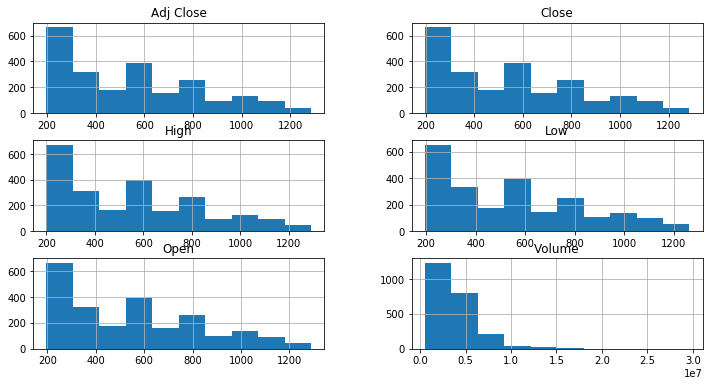

In [22]:
totaldata.hist(figsize=(12, 6))
plt.show()

In [23]:
# Correlation Matrix

totaldata.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999879,0.999815,0.999687,0.999687,-0.573989
High,0.999879,1.000000,0.999805,0.999844,0.999844,-0.572042
Low,0.999815,0.999805,1.000000,0.999874,0.999874,-0.577802
Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422
Adj Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422
Volume,-0.573989,-0.572042,-0.577802,-0.575422,-0.575422,1.000000


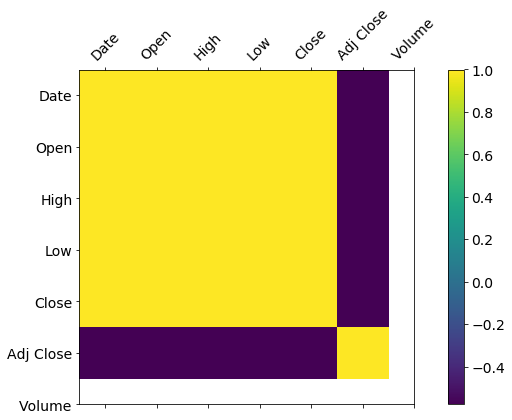

In [25]:
# Correlation Matrix Plot

f = plt.figure(figsize=(12, 6))
plt.matshow(totaldata.corr(), fignum=f.number)
plt.xticks(range(totaldata.shape[1]), totaldata.columns, fontsize=14, rotation=45)
plt.yticks(range(totaldata.shape[1]), totaldata.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [26]:
# Correlation heatmap

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(7, 7))
corr = totaldata.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1,1,1,1,1,-0.57
High,1,1,1,1,1,-0.57
Low,1,1,1,1,1,-0.58
Close,1,1,1,1,1,-0.58
Adj Close,1,1,1,1,1,-0.58
Volume,-0.57,-0.57,-0.58,-0.58,-0.58,1


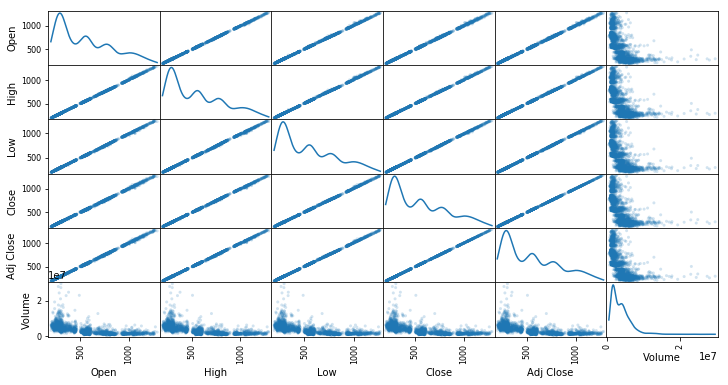

In [27]:
# Attribute Scatter Plot Matrix

from pandas.plotting import scatter_matrix

scatter_matrix(totaldata, figsize=(12, 6), diagonal='kde', alpha=0.2)
plt.show()

## Splitting the Data

You can see that we have the dataset over the years from 2009 to 2018. We planned to train the model over the data from 2009 to 2017 and test it on 2018 data. So, we need to filter the data into two parts.

- data_from_2009_to_2017 (starting from May 2009 to December 2017 included)
- data_2018 (starting from January 2018 to August 2018)

In [28]:
# converting the Date row of the Dataframe to datetime format for easy handling

import datetime
totaldata['Date'] = pd.to_datetime(totaldata['Date'])

In [29]:
# the seperation date

dec_2017 = '2017-12-31'

### data_from_2009_to_2017

In [30]:
mask = (totaldata['Date'] <= dec_2017)
data_09to17 = totaldata.loc[mask]

In [31]:
data_09to17.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2163,2017-12-22,1070.000000,1071.719971,1067.640015,1068.859985,1068.859985,889400
2164,2017-12-26,1068.640015,1068.859985,1058.640015,1065.849976,1065.849976,918800
2165,2017-12-27,1066.599976,1068.270020,1058.380005,1060.199951,1060.199951,1116200
2166,2017-12-28,1062.250000,1064.839966,1053.380005,1055.949951,1055.949951,994200
2167,2017-12-29,1055.489990,1058.050049,1052.699951,1053.400024,1053.400024,1180300


### data_2018

In [32]:
mask = (totaldata['Date'] > dec_2017)
data_18 = totaldata.loc[mask]

In [33]:
data_18.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2168,2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
2169,2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900
2170,2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600
2171,2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500
2172,2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200


We will use the `data_09to17` for the further steps. We will use the `data_18` in the end for testing and validating.

## Data Preprocessing

The dataset contains various information like displayed above. But in this project we will only use the `Open` stock prices for training our model. Therefore for the purpose of convenience we will create another variable that stores only the required (`Open` stock price) information. 

In [34]:
training_set = data_09to17.iloc[:,1:2].values

print(training_set)
print("********************")
print("********************")
print(training_set.shape)

[[ 198.528534]
 [ 196.171173]
 [ 203.023026]
 ...
 [1066.599976]
 [1062.25    ]
 [1055.48999 ]]
********************
********************
(2168, 1)


Now we can see that there is only one column with the `Open` stock prices. There are a total of 2168 stock prices.

### Additional Information (Things to Remember!)

In [35]:
print(type(data_09to17))
print(type(data_09to17.iloc[:,1:2]))   
print(type(data_09to17.iloc[:,1:2].values))

# iloc[rangeofRows, rangeofColumns]
# Indexing starts from zero.
# ":" indicates entire range.
# "1:2" indicates column one only. Because, the upper bound will be excluded. 
# mathematical operation are performed on the arrays. So, it is crusial to convert the data to arrays.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


## Feature scaling

The performance of the neural network will be better if the entire training input is in the same range. As we can see from above the stock prices are not in the same range. So, we need to scale the training data such that they are in the same range. This process is called Feature Scaling. The two popular methods for feature scaling are:

* **Standardization**

$ x' = \frac{x - \bar{x}}{\sigma} $

where $ x $ is the original feature vector, $ \bar{x} $ is the mean of that feature vector, and $ \sigma $ is its standard deviation.

* **Normalization** (Min-Max normalization)

$ x' = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)} $

where $ x $ is an original value, $ x' $ is the normalized value.

It is recommended to use Normalization in the case of RNN networks. Therefore we use Min-Max normalization here. You may also experiment with different feature scaling methods.

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)) 
scaled_training_set = scaler.fit_transform(training_set)

print(scaled_training_set.shape)
scaled_training_set

(2168, 1)


array([[0.00265813],
       [0.        ],
       [0.00772607],
       ...,
       [0.98148496],
       [0.97657998],
       [0.96895747]])

The `fit` method only calculates the min and max values. It does not apply the formula on the training set. The `fit_transform` method applies the minmax formula on the training set. After applying the minmax formula, the transformed values will be in the range 0 and 1 i.e, the training data (features) will be in the range 0 and 1 (as shown above).

## Implementation of LSTM model

In [40]:
X_train = []
y_train = []

for i in range(60, 2168):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [41]:
print(X_train.shape, y_train.shape)

(2108, 60) (2108,)


In [42]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(2108, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


In [44]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [45]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
 - 26s - loss: 0.0123
Epoch 2/20
 - 18s - loss: 0.0021
Epoch 3/20
 - 18s - loss: 0.0020
Epoch 4/20
 - 18s - loss: 0.0015
Epoch 5/20
 - 15s - loss: 0.0015
Epoch 6/20
 - 15s - loss: 0.0017
Epoch 7/20
 - 16s - loss: 0.0018
Epoch 8/20
 - 15s - loss: 0.0014
Epoch 9/20
 - 15s - loss: 0.0012
Epoch 10/20
 - 15s - loss: 0.0013
Epoch 11/20
 - 16s - loss: 0.0013
Epoch 12/20
 - 16s - loss: 0.0015
Epoch 13/20
 - 19s - loss: 0.0012
Epoch 14/20
 - 20s - loss: 0.0013
Epoch 15/20
 - 16s - loss: 0.0012
Epoch 16/20
 - 16s - loss: 0.0011
Epoch 17/20
 - 15s - loss: 0.0012
Epoch 18/20
 - 15s - loss: 0.0015
Epoch 19/20
 - 16s - loss: 0.0011
Epoch 20/20
 - 15s - loss: 0.0010


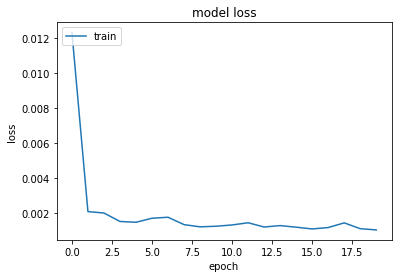

In [47]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [54]:
testing_set = data_18.iloc[:,1:2]

In [49]:
y_test = testing_set.iloc[60:,0:].values

In [55]:
testing_set = testing_set.iloc[:,0:].values 
scaled_testing_set = scaler.transform(testing_set)
scaled_testing_set.shape

(167, 1)

In [56]:
X_test = []

for i in range(60, 167):
    X_test.append(scaled_testing_set[i-60:i,0])
    
X_test = np.array(X_test)

In [57]:
print(X_test.shape)

(107, 60)


In [58]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) #adding the batch_size axis
X_test.shape

(107, 60, 1)

In [59]:
y_pred = model.predict(X_test) #predicting the new values

In [60]:
predicted_price = scaler.inverse_transform(y_pred) #inversing the scaling transformation for ploting

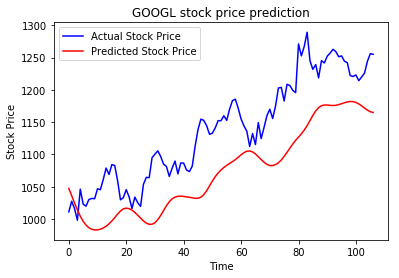

In [61]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOGL stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()